In [1]:
import pandas as pd
import numpy as np

data= pd.read_csv('covid.csv')
data

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False
5,6,Low,Normal,Normal,High,Normal,High,True
6,7,Normal,Low,Low,High,Normal,Normal,True
7,8,Normal,High,Normal,High,Normal,Normal,False
8,9,Normal,High,Normal,High,High,High,True
9,10,Normal,Normal,High,High,Normal,Normal,False


In [2]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
pc_enc=le.fit_transform(data['pc'].values)
wbc_enc=le.fit_transform(data['wbc'].values)
mc_enc=le.fit_transform(data['mc'].values)
ast_enc=le.fit_transform(data['ast'].values)
bc_enc=le.fit_transform(data['bc'].values)
idh_enc=le.fit_transform(data['ldh'].values)

Y=le.fit_transform(data['diagnosis'].values)
X=np.array(list(zip(pc_enc,wbc_enc,mc_enc,ast_enc,bc_enc,idh_enc)))
print(X)
print(Y)

[[1 1 1 0 1 1]
 [1 1 2 0 1 0]
 [1 0 2 0 1 1]
 [1 0 2 0 0 1]
 [1 2 0 0 1 1]
 [1 2 2 0 1 0]
 [2 1 1 0 1 1]
 [2 0 2 0 1 1]
 [2 0 2 0 0 0]
 [2 2 0 0 1 1]
 [2 2 0 0 1 0]
 [0 1 1 1 1 1]
 [0 2 0 1 1 1]
 [0 2 0 1 0 0]
 [0 0 2 1 1 0]
 [1 2 0 0 0 1]
 [2 2 0 0 0 1]
 [0 1 1 1 1 0]
 [2 2 2 0 1 1]
 [2 0 2 0 1 0]
 [2 1 2 0 1 0]
 [1 0 2 0 0 0]
 [1 1 1 0 0 0]
 [0 0 2 1 1 1]
 [0 2 2 1 1 1]]
[1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0]


In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, validation_curve
model=MultinomialNB()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=111)

model.fit(X_train,Y_train)

Y_pred= model.predict(X_test)

print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("\n report:")
print(classification_report(Y_test,Y_pred))


Accuracy: 0.8

 report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



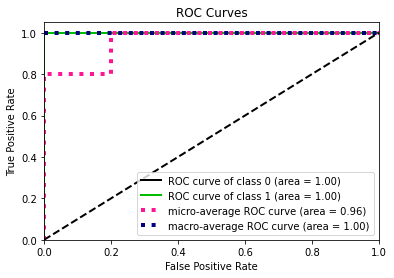

In [4]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_prob= model.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test,y_prob)
plt.show()

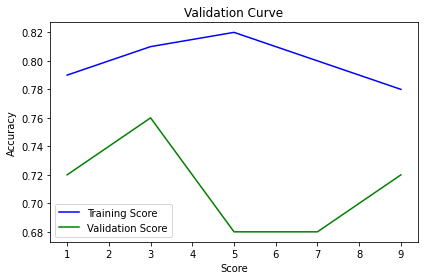

In [5]:
parameter_range = np.arange(1, 10, 2)
train_score, test_score = validation_curve(MultinomialNB(), X, Y,param_name = "alpha",param_range = parameter_range,cv = 5,
                                           scoring = "accuracy")

mean_t1 = np.mean(train_score, axis = 1)
std_t1 = np.std(train_score, axis = 1)

mean_t2 = np.mean(test_score, axis = 1)
std_t2 = np.std(test_score, axis = 1)

plt.plot(parameter_range, mean_t1,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_t2,
   label = "Validation Score", color = 'g')
plt.title("Validation Curve")
plt.xlabel("Score")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()